In [1]:
using Revise
using PauliPropagation
using Plots

In [2]:
nq = 8
op = PauliString(nq, :Z, 4)

PauliString(nqubits: 8, 1.0 * IIIZIIII)

In [3]:
nl = 4
topo = bricklayertopology(nq; periodic=false)

circ = hardwareefficientcircuit(nq, nl; topology=topo)
nparams = countparameters(circ)
ngates = length(circ)

124

### Sample Pauli Weight Distribution

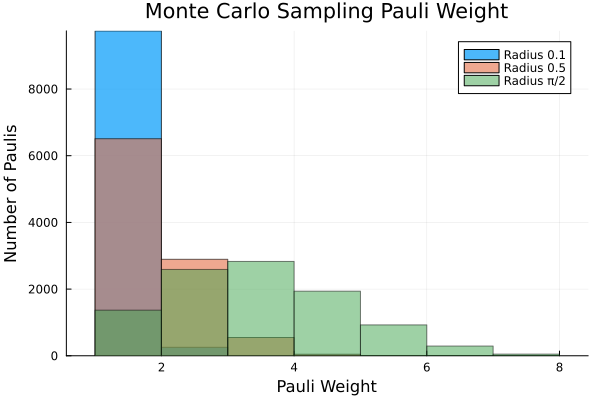

In [4]:
histogram(xlabel="Pauli Weight", ylabel="Number of Paulis", title="Monte Carlo Sampling Pauli Weight")
# TODO: define weight truncation for pstrings
r = 0.1
histogram!([countweight(montecarlopropagation(circ, op, r)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.7, label = "Radius 0.1")
r = 0.5
histogram!([countweight(montecarlopropagation(circ, op, r)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.6, label = "Radius 0.5")
r = π/2
histogram!([countweight(montecarlopropagation(circ, op, r)[1].operator) for _ in 1:10000], bins=1:nq, alpha=0.5, label = "Radius π/2")

### Testing Weight Truncation

In [5]:
Ws = 0:nq
@time errors = [estimateaverageerror(circ, op, 100000; max_weight=W) for W in Ws];
errors[errors .<= 1e-10] .= 1e-10;

 11.186654 seconds (1.10 G allocations: 25.717 GiB, 32.21% gc time, 15.44% compilation time)


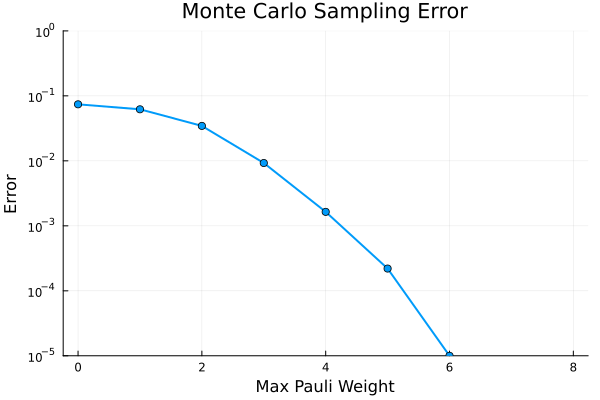

In [6]:
plot(Ws, errors, yscale=:log10, xlabel="Max Pauli Weight", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)

### Testing Frequency Truncation

In [7]:
wrapped_op = wrapcoefficients(op)

PauliString(nqubits: 8, PathProperty(NumericPathProperties) * IIIZIIII)

In [8]:
freqs = 0:5:50
@time errors = [estimateaverageerror(circ, wrapped_op, 100000; max_freq=freq) for freq in freqs]
# where errors are zero, replace with small number to avoid log(0) error
errors[errors .<= 1e-10] .= 1e-10;

 13.228977 seconds (1.11 G allocations: 27.970 GiB, 29.62% gc time, 14.69% compilation time)


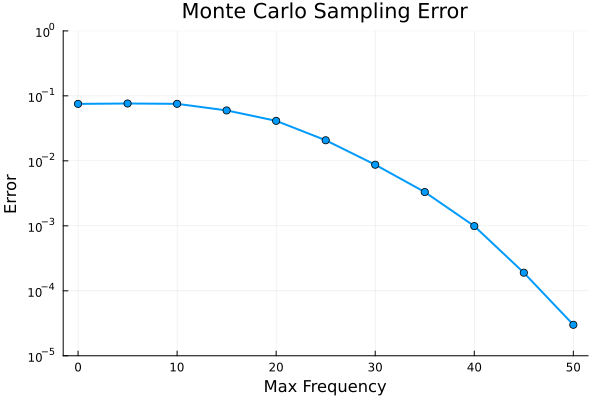

In [9]:
plot(freqs, errors, yscale=:log10, xlabel="Max Frequency", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0), label="", linewidth=2, marker=:circle)

### Test Small-Angle Truncation

 14.225032 seconds (1.24 G allocations: 29.817 GiB, 30.16% gc time, 11.26% compilation time)
 13.215164 seconds (1.24 G allocations: 29.808 GiB, 31.67% gc time)
  8.023352 seconds (1.24 G allocations: 29.822 GiB, 29.89% gc time)
  8.017244 seconds (1.24 G allocations: 29.898 GiB, 30.01% gc time)
  7.893506 seconds (1.25 G allocations: 30.073 GiB, 29.38% gc time)
  8.155551 seconds (1.27 G allocations: 30.366 GiB, 29.62% gc time)
  8.177870 seconds (1.29 G allocations: 30.591 GiB, 31.00% gc time)


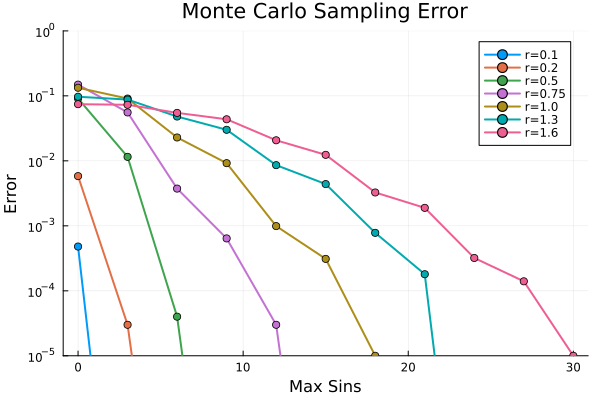

In [10]:
nsins = 0:3:30
rs = [0.1, 0.2, 0.5, 0.75, 1.0, 1.3, π/2]

pl = plot(yscale=:log10, xlabel="Max Sins", ylabel="Error", title="Monte Carlo Sampling Error", ylim=(1e-5, 1e0))

for r in rs
    @time errors = [estimateaverageerror(circ, wrapped_op, 100000, r; max_sins=ns) for ns in nsins]
    # where errors are zero, replace with small number to avoid log(0) error
    errors[errors .<= 1e-10] .= 1e-10;

    plot!(nsins, errors, label="r=$(round(r, sigdigits=2))", linewidth=2, marker=:circle)
end
pl